# Mapas auto-organizados (SOMs) 


In [10]:
### import packages:
################Pacotes#################
%matplotlib inline
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
########################################

## Leitura dos dados litologicos do Kohonen :

In [16]:
#SOM = np.loadtxt('../outputs/Real/REAL_SOM2_norm_minmax.txt', skiprows = 0, unpack = True)  # Classificacao do poco C1
SOM = np.loadtxt('../outputs/Real/SOM2_260620a.txt', skiprows = 0, unpack = True)

# Cabeçalho útil para fazer os graficos:

In [17]:
### -------create the tabuleiro dos neurons! ----------------###
# get number of neurons in each dimension:
nx = np.size( SOM[1] )
ny = np.size( SOM[0] )
print(nx, ny)

# create the tabuleiro based on the number of neurons in each axis:
xn = np.arange(0, nx+1 ) # numero de neuronios + 1 em x ...
yn = np.arange(0, ny+1 ) # ... e em y
Xn,Yn = np.meshgrid(yn,xn)

5 5


In [18]:
# create information for the plot:
rocks = ['Shale', 'Sandstone', 'Diabase', 'Diamictite', ' Marl', 'Calciliferous mudstone', 'Claystone', 
         'Basalt','Siltstone', 'Calciliferous sandstone','Metamorphic']

profiles = ['RHOB', 'GR', 'SP', 'DT']

num_rocks = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])



# segundo método
#codigo={6:['#4effff', 'Calcilutite'],
#      44:['#0eec5d', 'Diamictite'],
#      49:['#ffe57b', 'Sandstone'],
#      54:['#af1d4e','Siltite'],
#      56:['#7eff00', 'Claystone']
#      57:['#3fff00','Shale'],
#      58:['#2f0eff', 'Marl'],
#      65:['#ff00ff', 'Diabase']}

rockcolors={ 6:['#4effff', 'Calciferous mudstone'],
             8:['#0080ef','Calciferous sandstone'],
            42:['#ffbf20','Conglomerate'],
            44:['#10ef60','Diamictite'],
            49:['#ffff40','Sandstone'],
            54:['#af2050','Siltstone'],
            57:['#40ff00' ,'Shale'],
            65:['#ff00ff' ,'Diabase'],
            66:['#f900f9','Basalt'],
            70:['#ff0000' ,'Metamorphic']}


# SOM para os dados de treinamento:

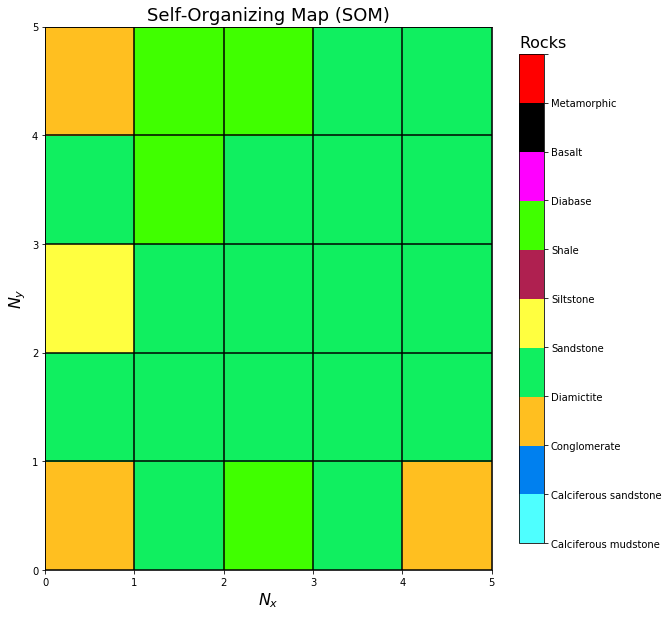

In [19]:
######## Metade do treinamento : ####################
py.rcParams['figure.figsize'] = (10.0, 10.0) # Redimensiona a figura (NAOOOO MEXER AKIIIII!!!!!!!!!!)
fig, ax = plt.subplots(nrows=1, ncols=1)
#ax1 = plt.subplot(111)

# Generate a colormap index based on discrete intervals:
cmap = colors.ListedColormap(['#4effff', '#0080ef', '#ffbf20', '#10ef60',
                              '#ffff40', '#af2050', '#40ff00', '#ff00ff', 'black','#f900f9','#ff0000'], 
                             name='Rock Units', N=11)

litos = ['Calciferous mudstone', 'Calciferous sandstone','Conglomerate', 'Diamictite', 
              'Sandstone', 'Siltstone', 'Shale', 'Diabase','Basalt','Metamorphic','']#Cria um espaço artificial para alocar a última rocha na legenda

boundaries = [6, 8 ,43, 48, 53, 55, 56.5, 57.5, 64, 66, 71]# CUIDADO COM OS BOUNDARIES (bound-1) 
norm = colors.BoundaryNorm(boundaries, ncolors=11, clip=True)

# area of the plot:
extent = (0, 20, 0, 20)

# plot the tabuleiro: 
plt.plot(Xn,Yn,'-k')
plt.plot(Yn,Xn,'-k')

# plot using imshow:
im1 = ax.pcolormesh(Xn,Yn, SOM, cmap=cmap, norm=norm)

# get colorbar information:
cb1 = fig.colorbar(im1, shrink=0.90, ticks=boundaries, orientation='vertical')

#title of the colorbar:
cb1.ax.set_title('Rocks', fontsize = 16 ,loc='left'  )
cb1.ax.set_yticklabels(litos)  # vertical colorbar


titul = 'Self-Organizing Map (SOM)'

# details aobut the axis:
ax.set_ylabel('$N_y$',fontsize=16)
ax.set_xlabel('$N_x$',fontsize=16)
ax.set_title(titul,fontsize=18)
plt.savefig('../images/cortex_Real_260620a.png',dpi=600, bbox_inches='tight',transparent=True) 
plt.show()

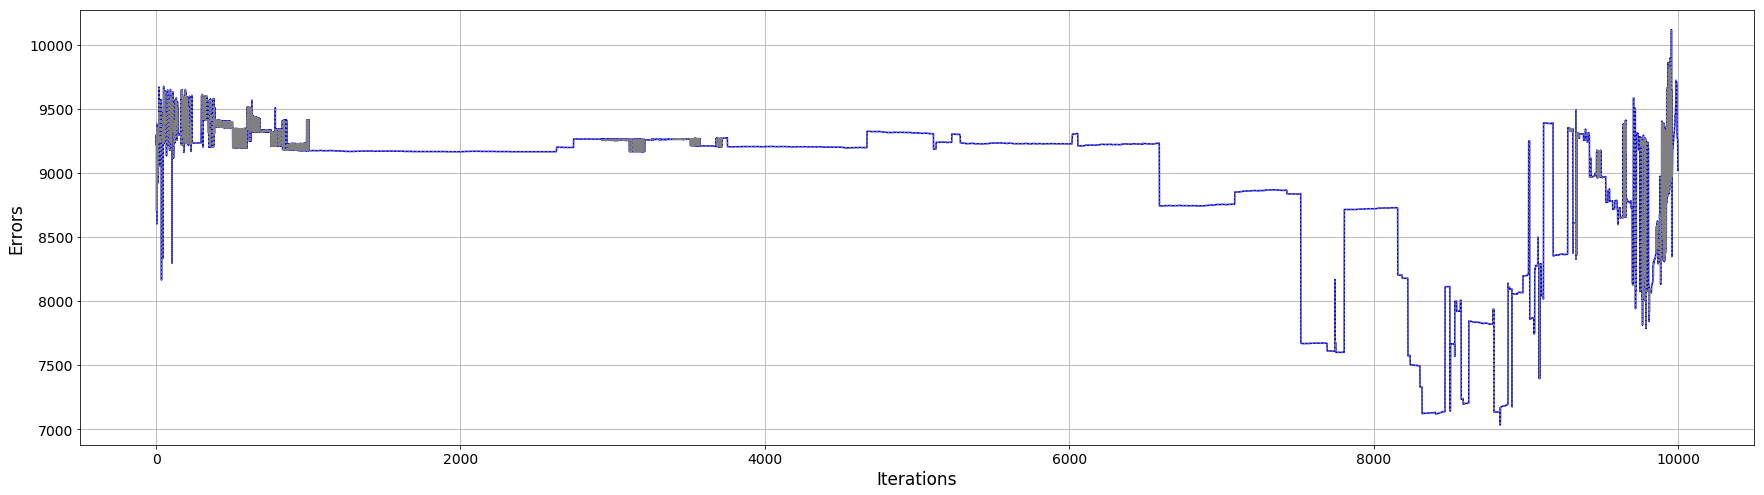

In [20]:
#Gerando o Gráfico de convergência:
convergencia=np.loadtxt('../outputs/Real/CONV_260620a.txt')#dado de convergência gerado pelo koho
#print(convergencia)

x=convergencia[:,0]
y=convergencia[:,1]

py.rcParams['figure.figsize'] = (30.0, 8.0)#Redimensiona a figura

plt.plot( x, y, 'b') # blue sem bolinha se quiser bolinha escreve 'o'
plt.plot( x, y, 'k:', color='grey') # linha pontilha black

#plt.title("Convergence", fontweight='bold', fontsize=25)
plt.tick_params(axis='both', labelsize=14)#aumenta o tamanho dos valores nos eixos

plt.grid(True)
plt.xlabel("Iterations", fontsize=17)
plt.ylabel("Errors", fontsize=17)
plt.savefig('../images/CONV_260620a.png',dpi=600, bbox_inches='tight',transparent=True)  
plt.show()  
plt.close()

# FIM.